# Use Case 4: How do mutations affect protein abundance

## Step 1: Importing packages and setting up your notebook. 

We start the notebook by importing the standard packages for data science. These are useful for playing data in dataframes and for plotting the results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Our cancer data and a variety of accessory functions are provided in the CPTAC package.

In [2]:
import CPTAC.Endometrial as en

Welcome to the CPTAC data service package. Available datasets may be
viewed using CPTAC.list(). In order to access a specific data set,
import a CPTAC subfolder using either 'import CPTAC.Dataset' or 'from
CPTAC import Dataset'.
******
Version: 0.2.6
******
Loading Endometrial CPTAC data:
Loading Dictionary...
Loading Clinical Data...
Loading Acetylation Proteomics Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter embargo() to open the webpage for more details.


## Step 2: Getting data and finding your gene of interest

To begin, we first have to grab the data. We retrieve protein abudance and somatic gene mutations using <code>en.get_mutations()</code> and <code>en.get_proteomics()</code> functions. This puts the data into a dataframe for us.

In [3]:
somatic_mutations = en.get_mutations()
proteomics = en.get_proteomics()

Next, pick a gene of interest to see how mutation affects the protein abundance. For this example, we will look at PTEN which has the highest number of mutations within our cohort.  If you already know the name of the gene, just declare it directly with <code> gene="PTEN"</code>.

In [4]:
gene = somatic_mutations["Gene"].value_counts().index[0]
print(gene)

PTEN


## Step 3: Merging dataframes

The data for PTEN currently exists in two different dataframes, one for proteomics and one for the mutations. To make things easy for you, we have created a variety of functions to merge data across the dataframes. Here we want to merge mutation data with molecular measurements. This uses the <code>en.compare_mutations()</code> function. You need to specify as parameters the molecular dataframe (here 'proteomics') and the specific gene name. This creates a dataframe with three columns, one for the proteomics data, one for the mutation type, and one for the sample status. 

NOTE: The mutation status data comes from a [MAF file](http://www.bx.psu.edu/~dcking/man/maf.xhtml). It is important to understand that this only describes mutated sequences, and therefore is silent about wildtype alleles. Therefore "Wildtype" as returned by this function, is an imputed value based on two rules. First, for tumors that do not have mutations listed in the MAF file. Second, all non-tumor samples. 

In [5]:
omics_mutations = en.compare_mutations(proteomics, gene)
omics_mutations.head()

,PTEN,Mutation,Sample_Status
S001,-0.526,Nonsense_Mutation,Tumor
S002,-0.830,Missense_Mutation,Tumor
S003,-0.941,Nonsense_Mutation,Tumor
S005,0.730,Missense_Mutation,Tumor
S006,-0.379,Wildtype_Tumor,Tumor


## Step 4: Plot data

Our goal with this use case is to visually inspect how the protein abundance changes for patients with a mutation compared to the normal (or wildtype) gene sequence. We are going to use the Seaborn graphics and plotting package, which makes creating figures pretty easy. 

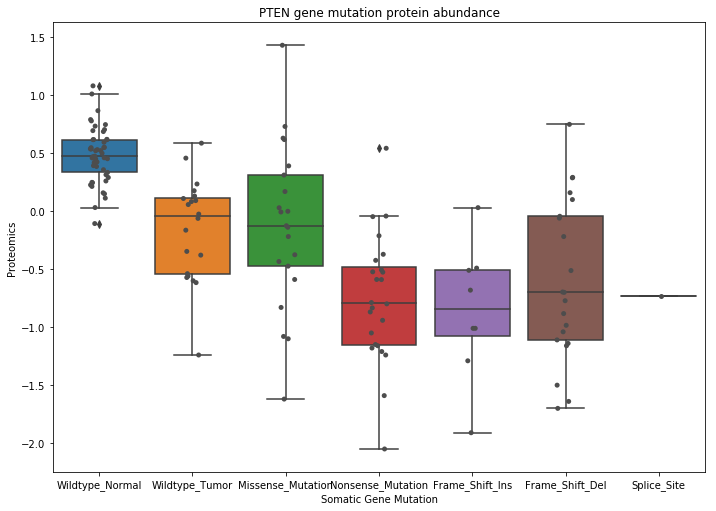

In [6]:
a4_dims = (11.7, 8.27) #dimensions for bigger plot
fig, ax = plt.subplots(figsize=a4_dims) #bigger plot displays Somatic Gene Mutation category without overlapping labels
somatic_boxplot = sns.boxplot(data=omics_mutations, x="Mutation",y=gene, ax = ax, order = ["Wildtype_Normal","Wildtype_Tumor","Missense_Mutation","Nonsense_Mutation","Frame_Shift_Ins","Frame_Shift_Del","Splice_Site"]) #order parameter is used to reorder the mutation categories 
somatic_boxplot.set_title("PTEN gene mutation protein abundance")
somatic_boxplot = sns.stripplot(data=omics_mutations, x="Mutation", y=gene,jitter=True, color=".3", order = ["Wildtype_Normal","Wildtype_Tumor","Missense_Mutation","Nonsense_Mutation","Frame_Shift_Ins","Frame_Shift_Del","Splice_Site"])
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()

## Step 5: Try it again

Let's try this again with a different gene. Beta-catenin (CTNNB1) is also frequently mutated in our cohort and well known as a oncogene. In the following two cells we will again make a merged dataframe (omics_mutations2) and then plot it out.

In [7]:
gene2 = 'CTNNB1'
omics_mutations2 = en.compare_mutations(proteomics, gene2)

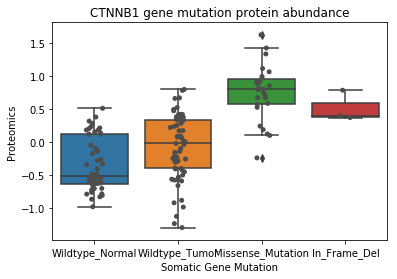

In [8]:
boxplot2 = sns.boxplot(data=omics_mutations2, x="Mutation",y=gene2, order = ["Wildtype_Normal","Wildtype_Tumor","Missense_Mutation","In_Frame_Del"])
boxplot2.set_title("CTNNB1 gene mutation protein abundance")
boxplot2 = sns.stripplot(data=omics_mutations2, x="Mutation",y=gene2,jitter=True, color=".3", order = ["Wildtype_Normal","Wildtype_Tumor","Missense_Mutation","In_Frame_Del"])
boxplot2.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()

## Step 6: Repeat with Ovarian data

Let's go through the same process, this time using the Ovarian dataset. Note that function calls are consistent between cancer types.

Loading Ovarian CPTAC data:
Loading clinical data...
Loading cnv data...
Loading phosphoproteomics data...
Loading proteomics data...
Loading somatic_19 data...
Loading somatic_38 data...
Loading transcriptomics data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until June 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter embargo() to open the webpage for more details.


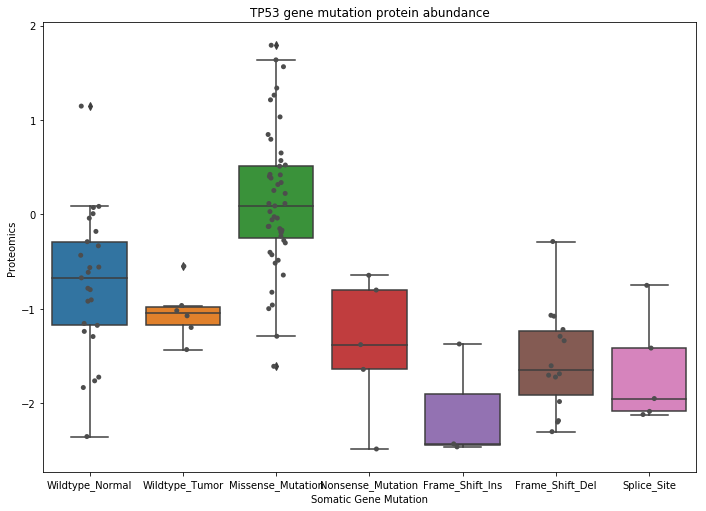

In [9]:
import CPTAC.Ovarian as ov

somatic_mutations = ov.get_mutations()
proteomics = ov.get_proteomics()

gene = "TP53"
ovarian_omics_mutations = ov.compare_mutations(proteomics, gene)

a4_dims = (11.7, 8.27) #dimensions for bigger plot
fig, ax = plt.subplots(figsize=a4_dims)
boxplot = sns.boxplot(data=ovarian_omics_mutations, x="Mutation", y=gene, order = ["Wildtype_Normal","Wildtype_Tumor","Missense_Mutation","Nonsense_Mutation","Frame_Shift_Ins","Frame_Shift_Del","Splice_Site"])
boxplot.set_title("TP53 gene mutation protein abundance")
boxplot = sns.stripplot(data=ovarian_omics_mutations, x="Mutation", y=gene,jitter=True, color=".3",order = ["Wildtype_Normal","Wildtype_Tumor","Missense_Mutation","Nonsense_Mutation","Frame_Shift_Ins","Frame_Shift_Del","Splice_Site"])
boxplot.set(xlabel="Somatic Gene Mutation", ylabel="Proteomics")
plt.show()